In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

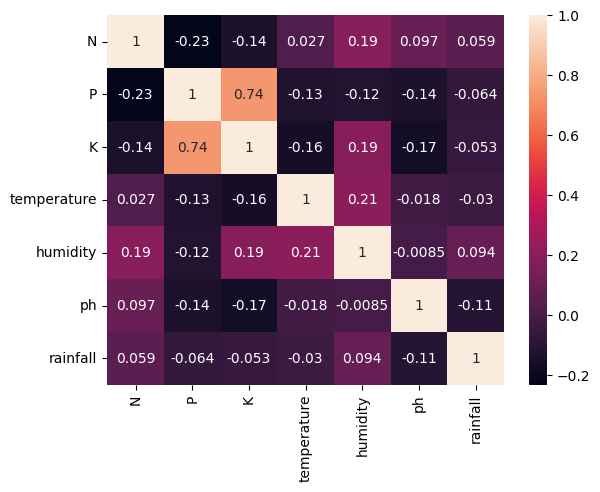

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =0, stratify = target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.63636363636364
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.67      1.00      0.80        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      0.95      0.97        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.40      0.57        20
 kidneybeans       1.00      0.85      0.92        20
      lentil       0.91      1.00      0.95        20
       maize       0.83      0.95      0.88        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.45      0.62        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00

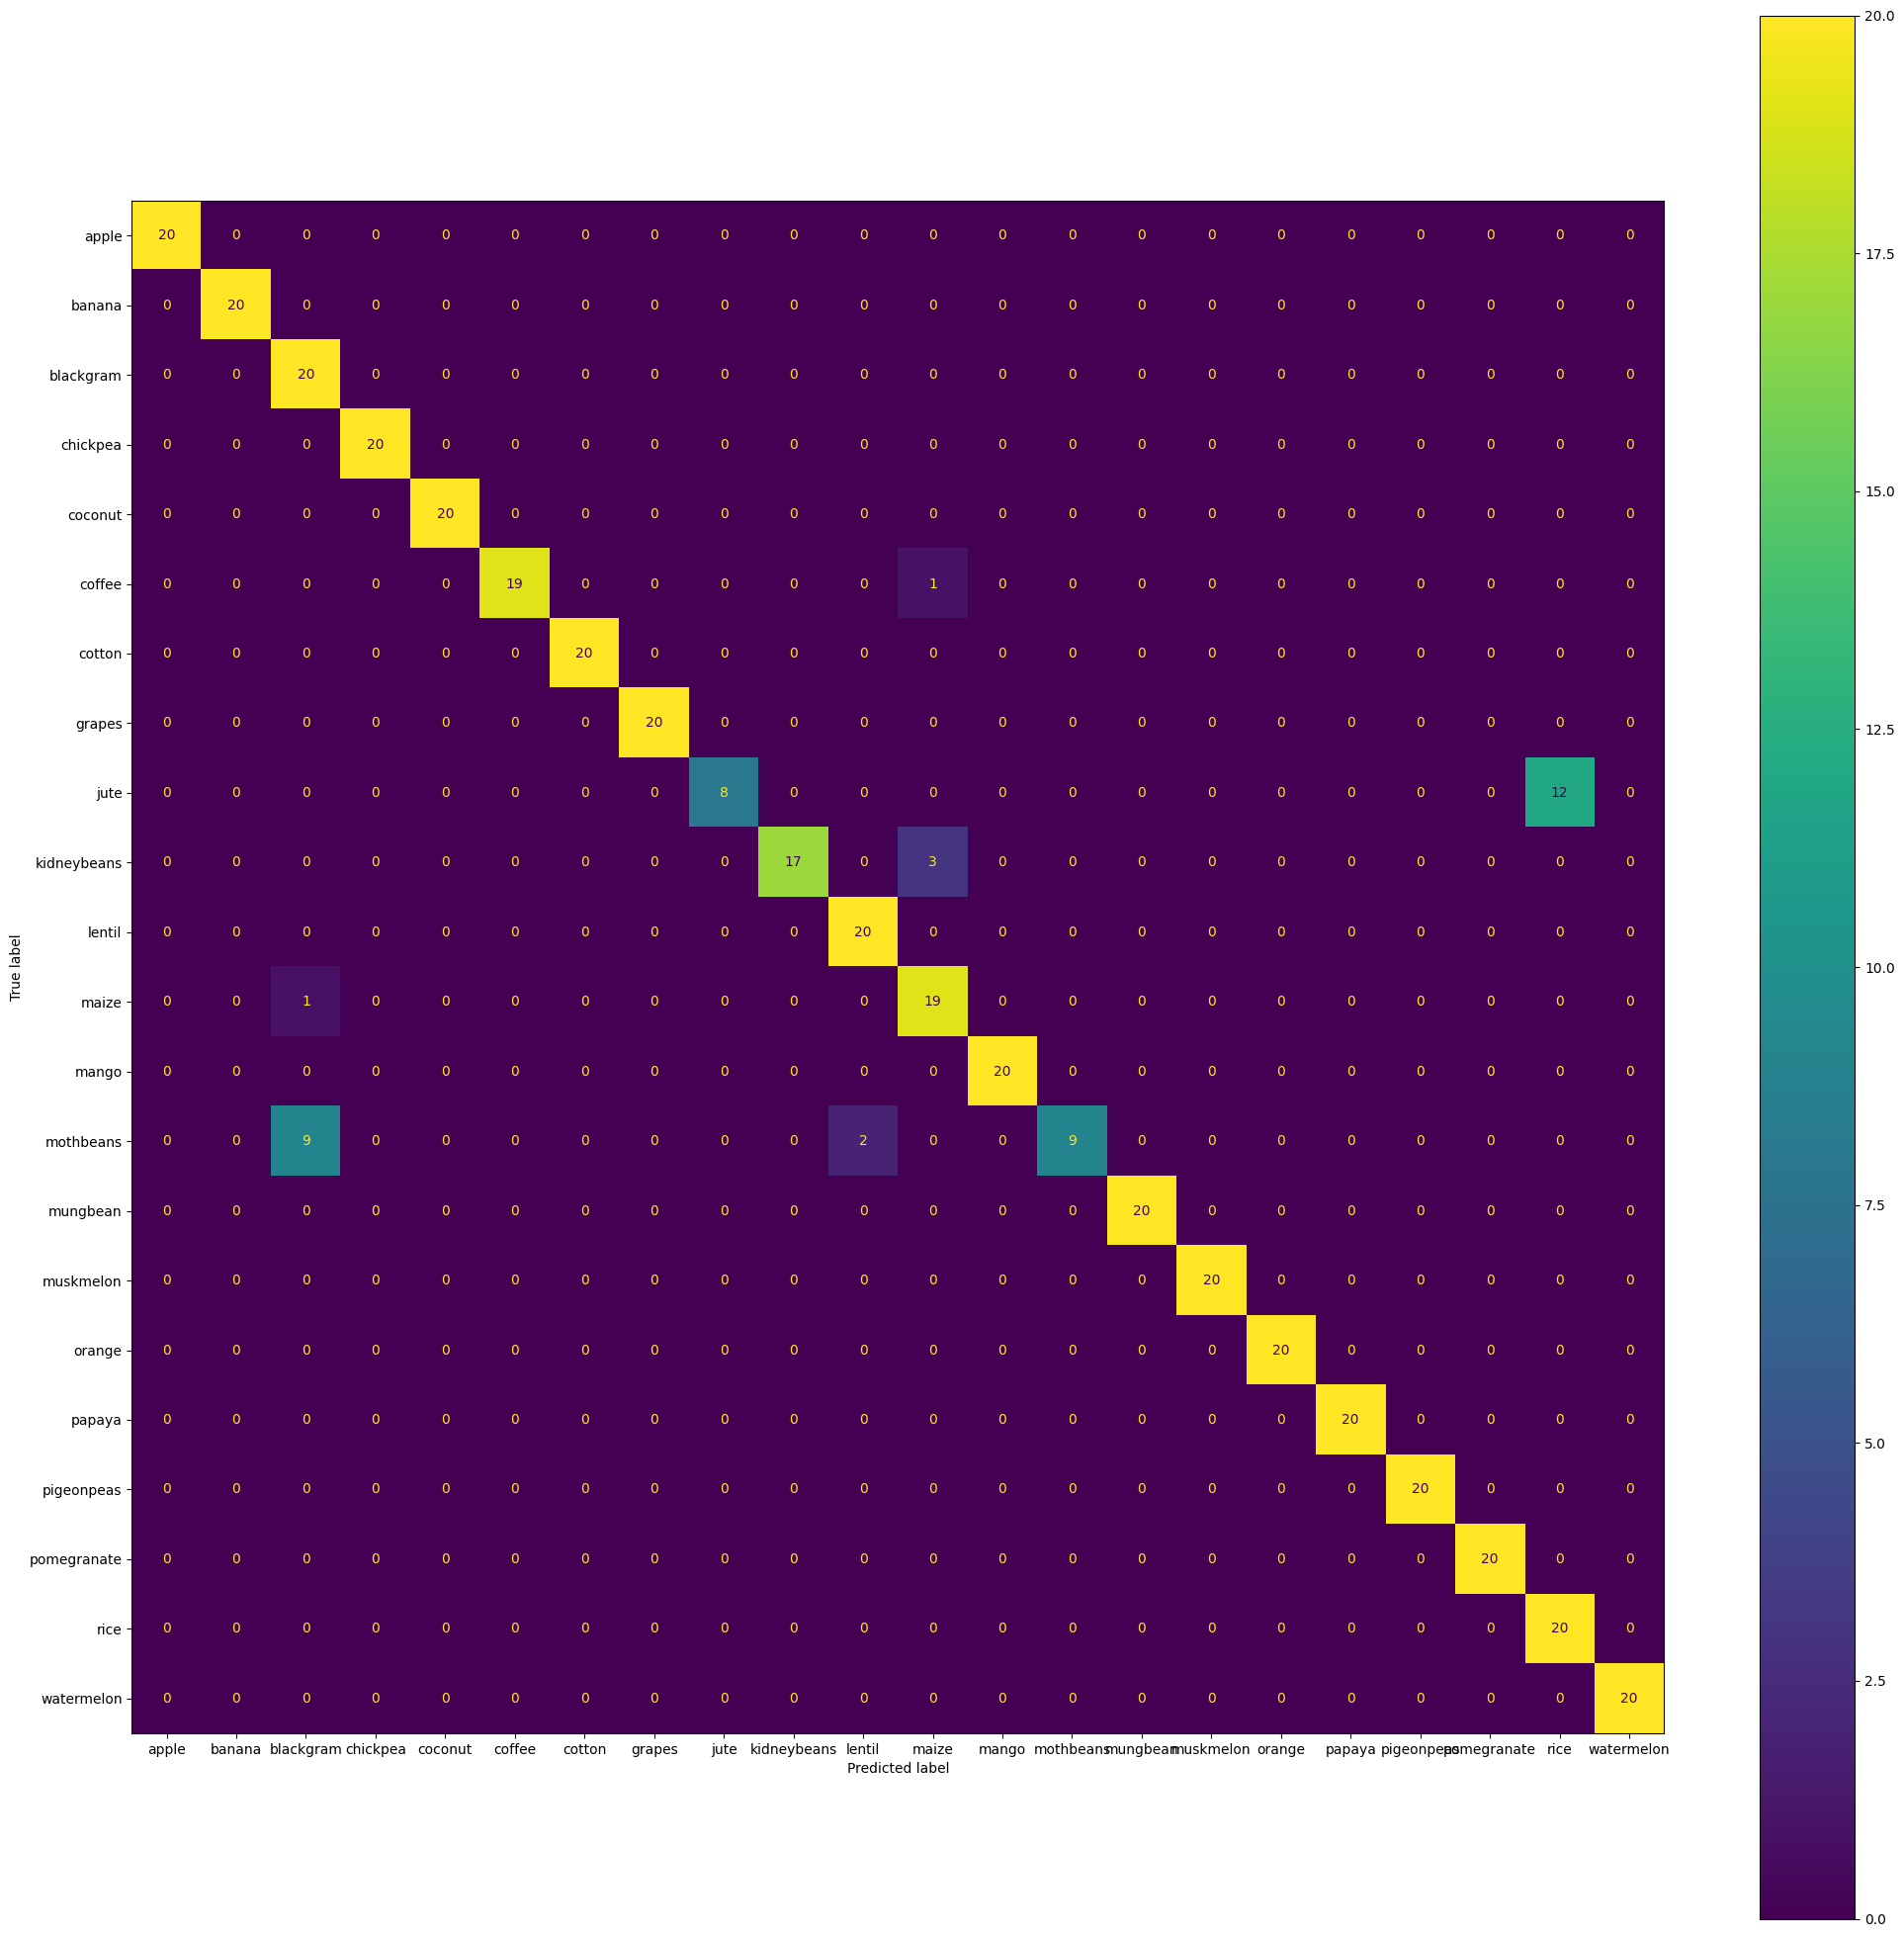

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=DecisionTree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DecisionTree.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00 

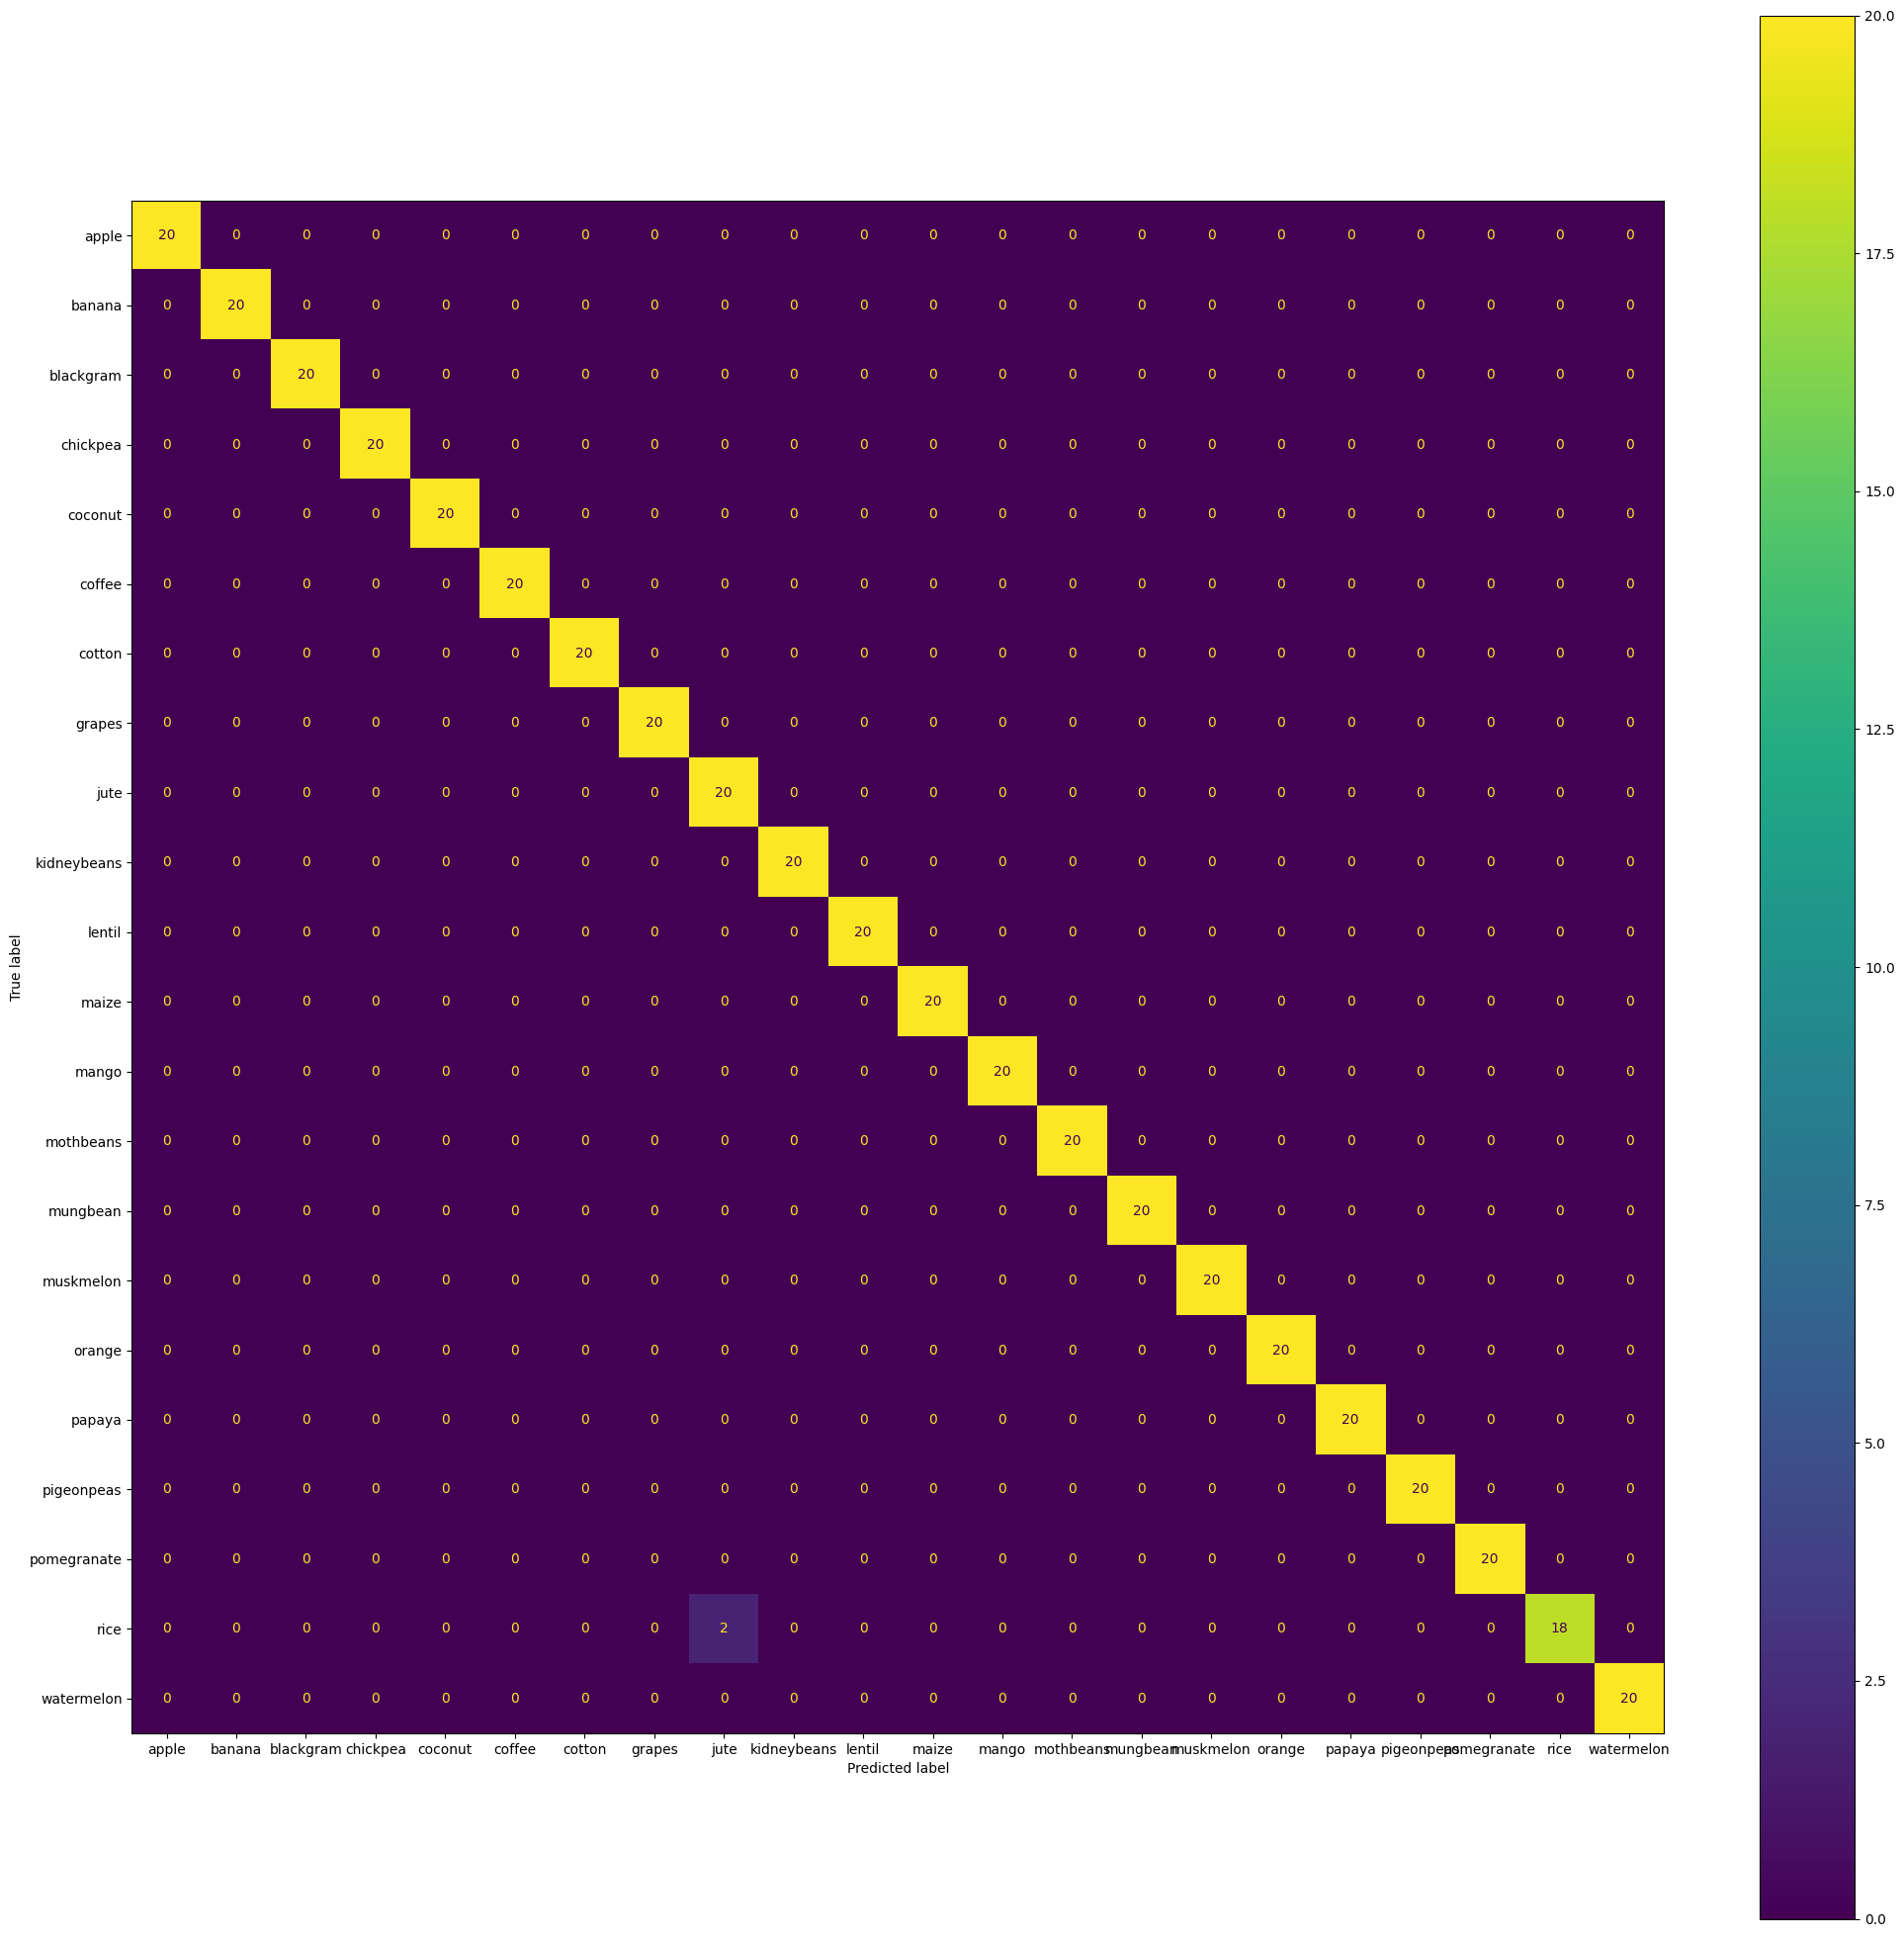

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=NaiveBayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NaiveBayes.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.22727272727272727
              precision    recall  f1-score   support

       apple       1.00      0.20      0.33        20
      banana       1.00      0.20      0.33        20
   blackgram       1.00      0.25      0.40        20
    chickpea       1.00      0.35      0.52        20
     coconut       1.00      0.10      0.18        20
      coffee       1.00      0.10      0.18        20
      cotton       1.00      0.20      0.33        20
      grapes       1.00      0.15      0.26        20
        jute       1.00      0.10      0.18        20
 kidneybeans       1.00      0.05      0.10        20
      lentil       0.00      0.00      0.00        20
       maize       1.00      0.10      0.18        20
       mango       1.00      0.25      0.40        20
   mothbeans       1.00      0.35      0.52        20
    mungbean       1.00      0.15      0.26        20
   muskmelon       1.00      0.60      0.75        20
      orange       1.00      0.25      0.

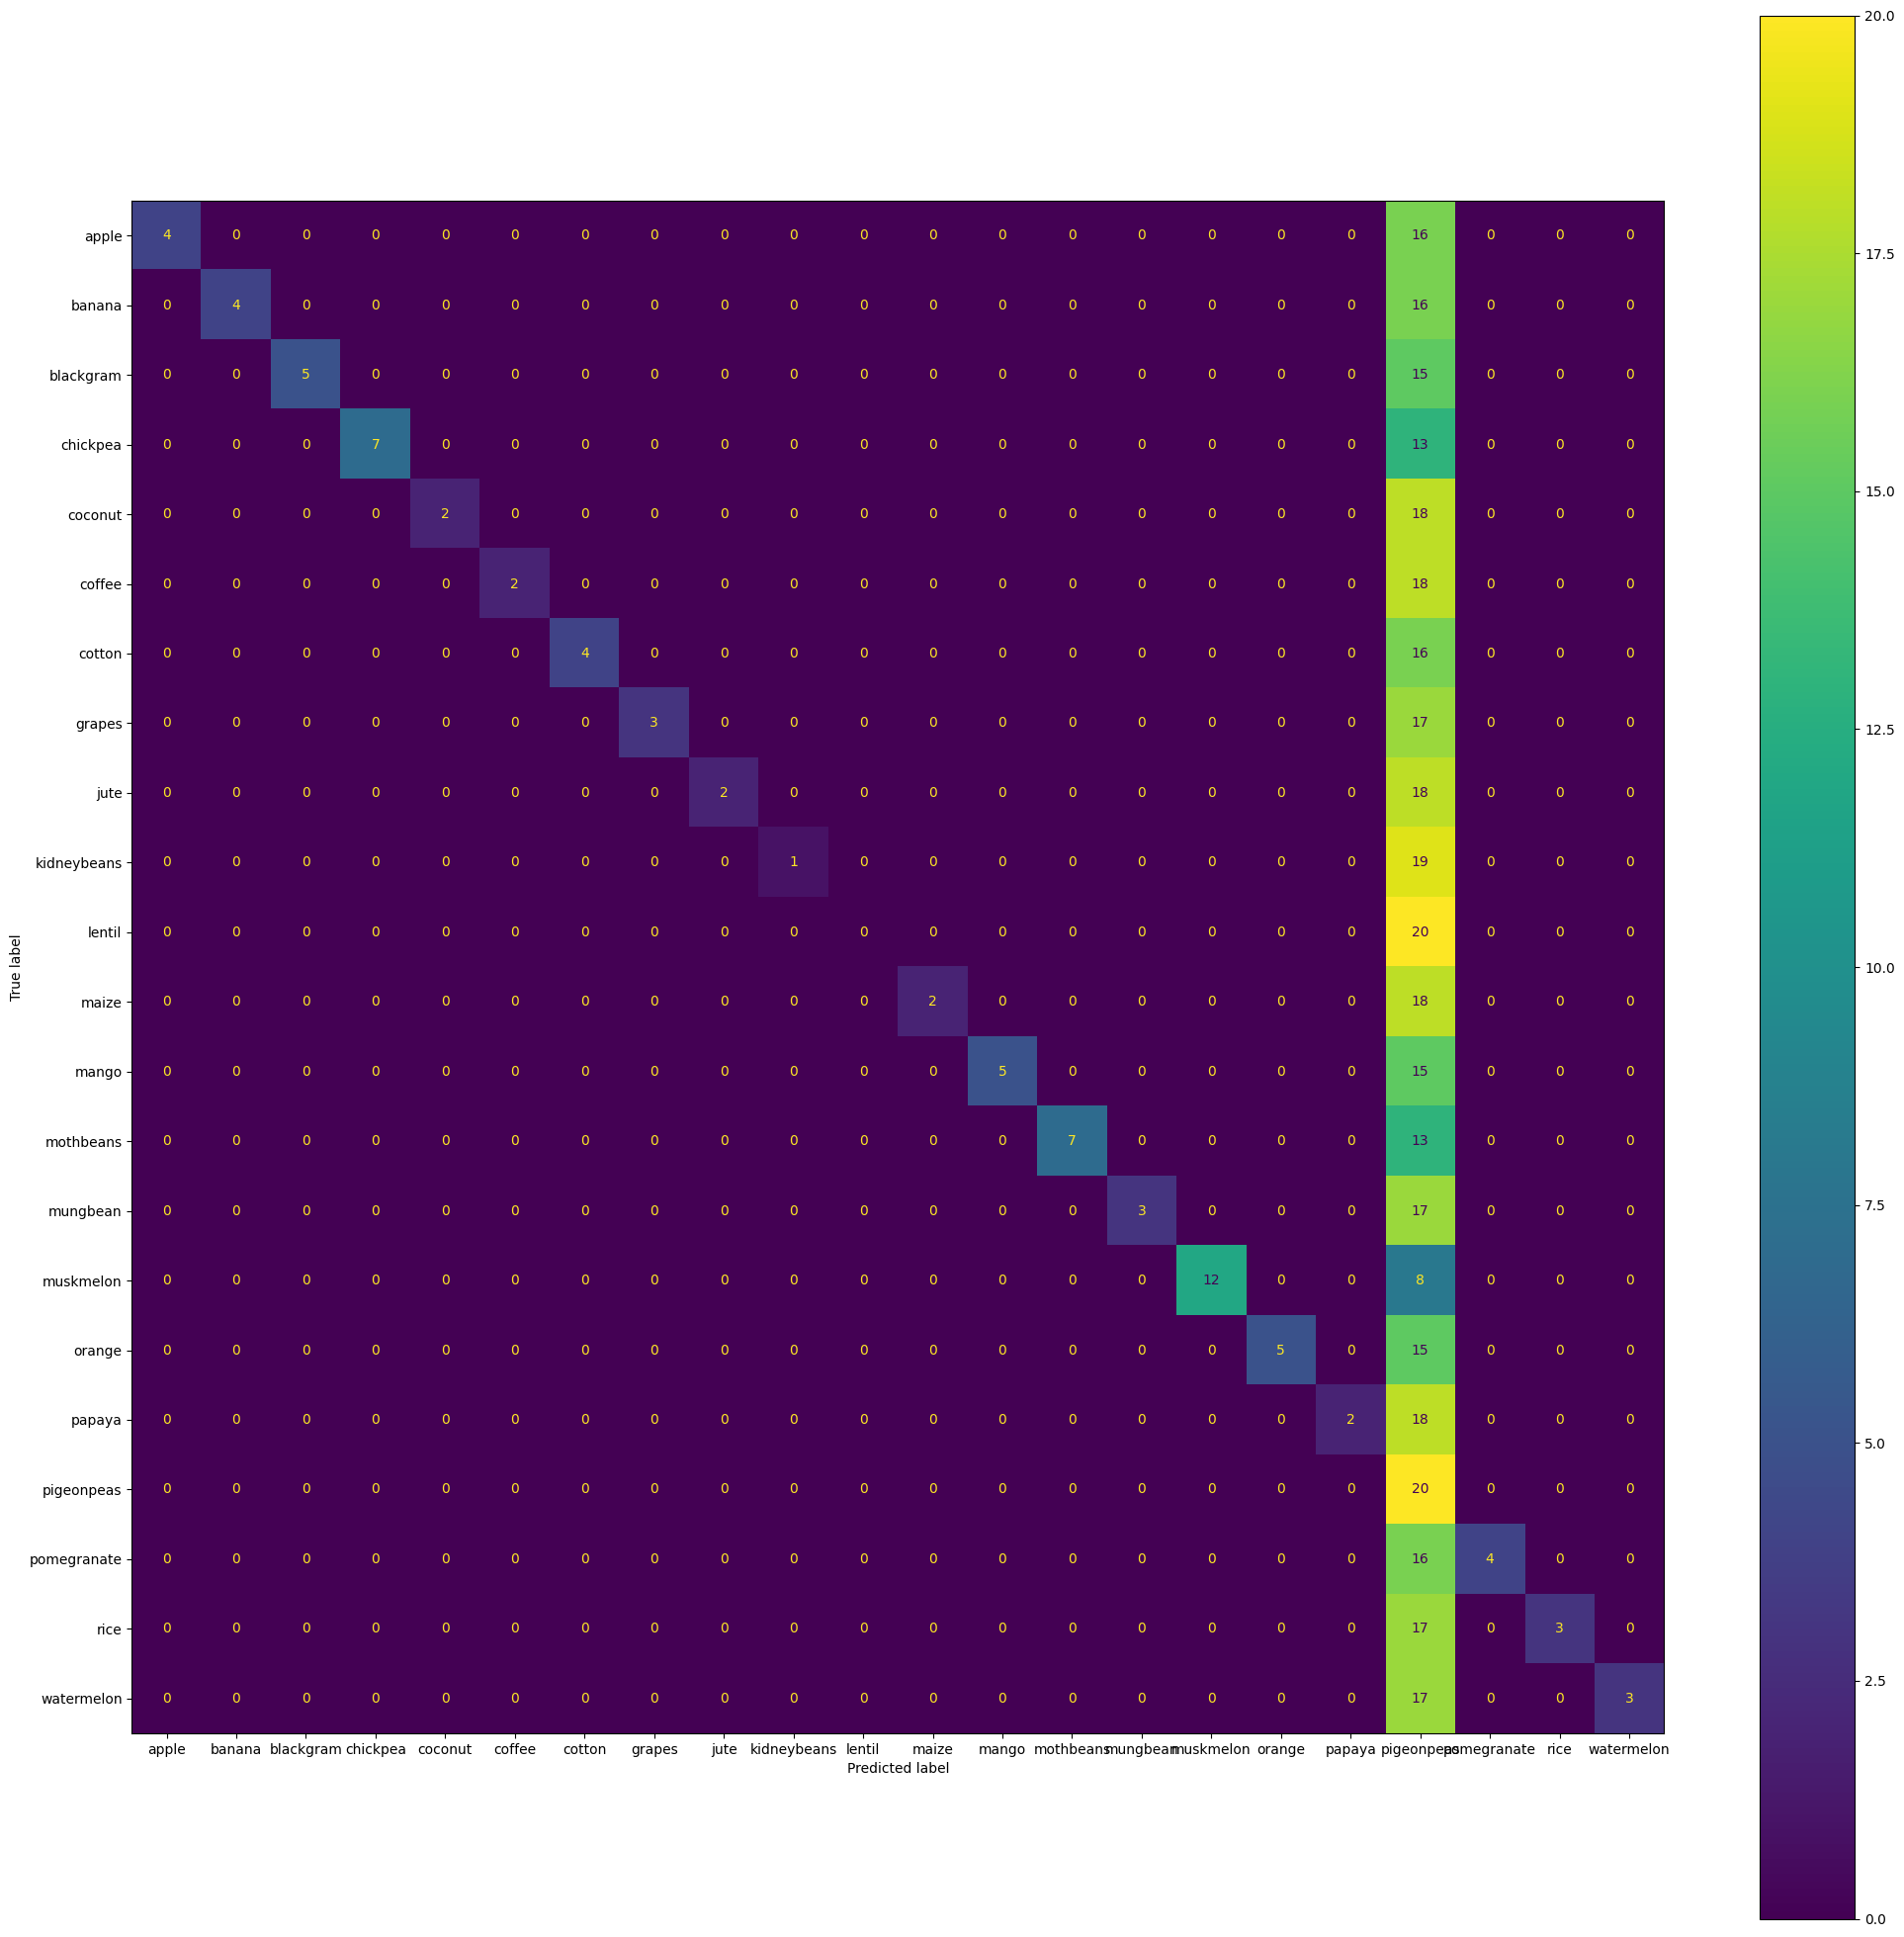

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
SVM.fit(Xtrain,Ytrain)
predicted_values = SVM.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       0.95      1.00      0.98        20
   blackgram       0.89      0.80      0.84        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.98        20
      cotton       0.95      0.95      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.89      0.85      0.87        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.89      0.85      0.87        20
       maize       0.95      0.90      0.92        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.75      0.90      0.82        20
    mungbean       0.95      0.90      0.92        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00   

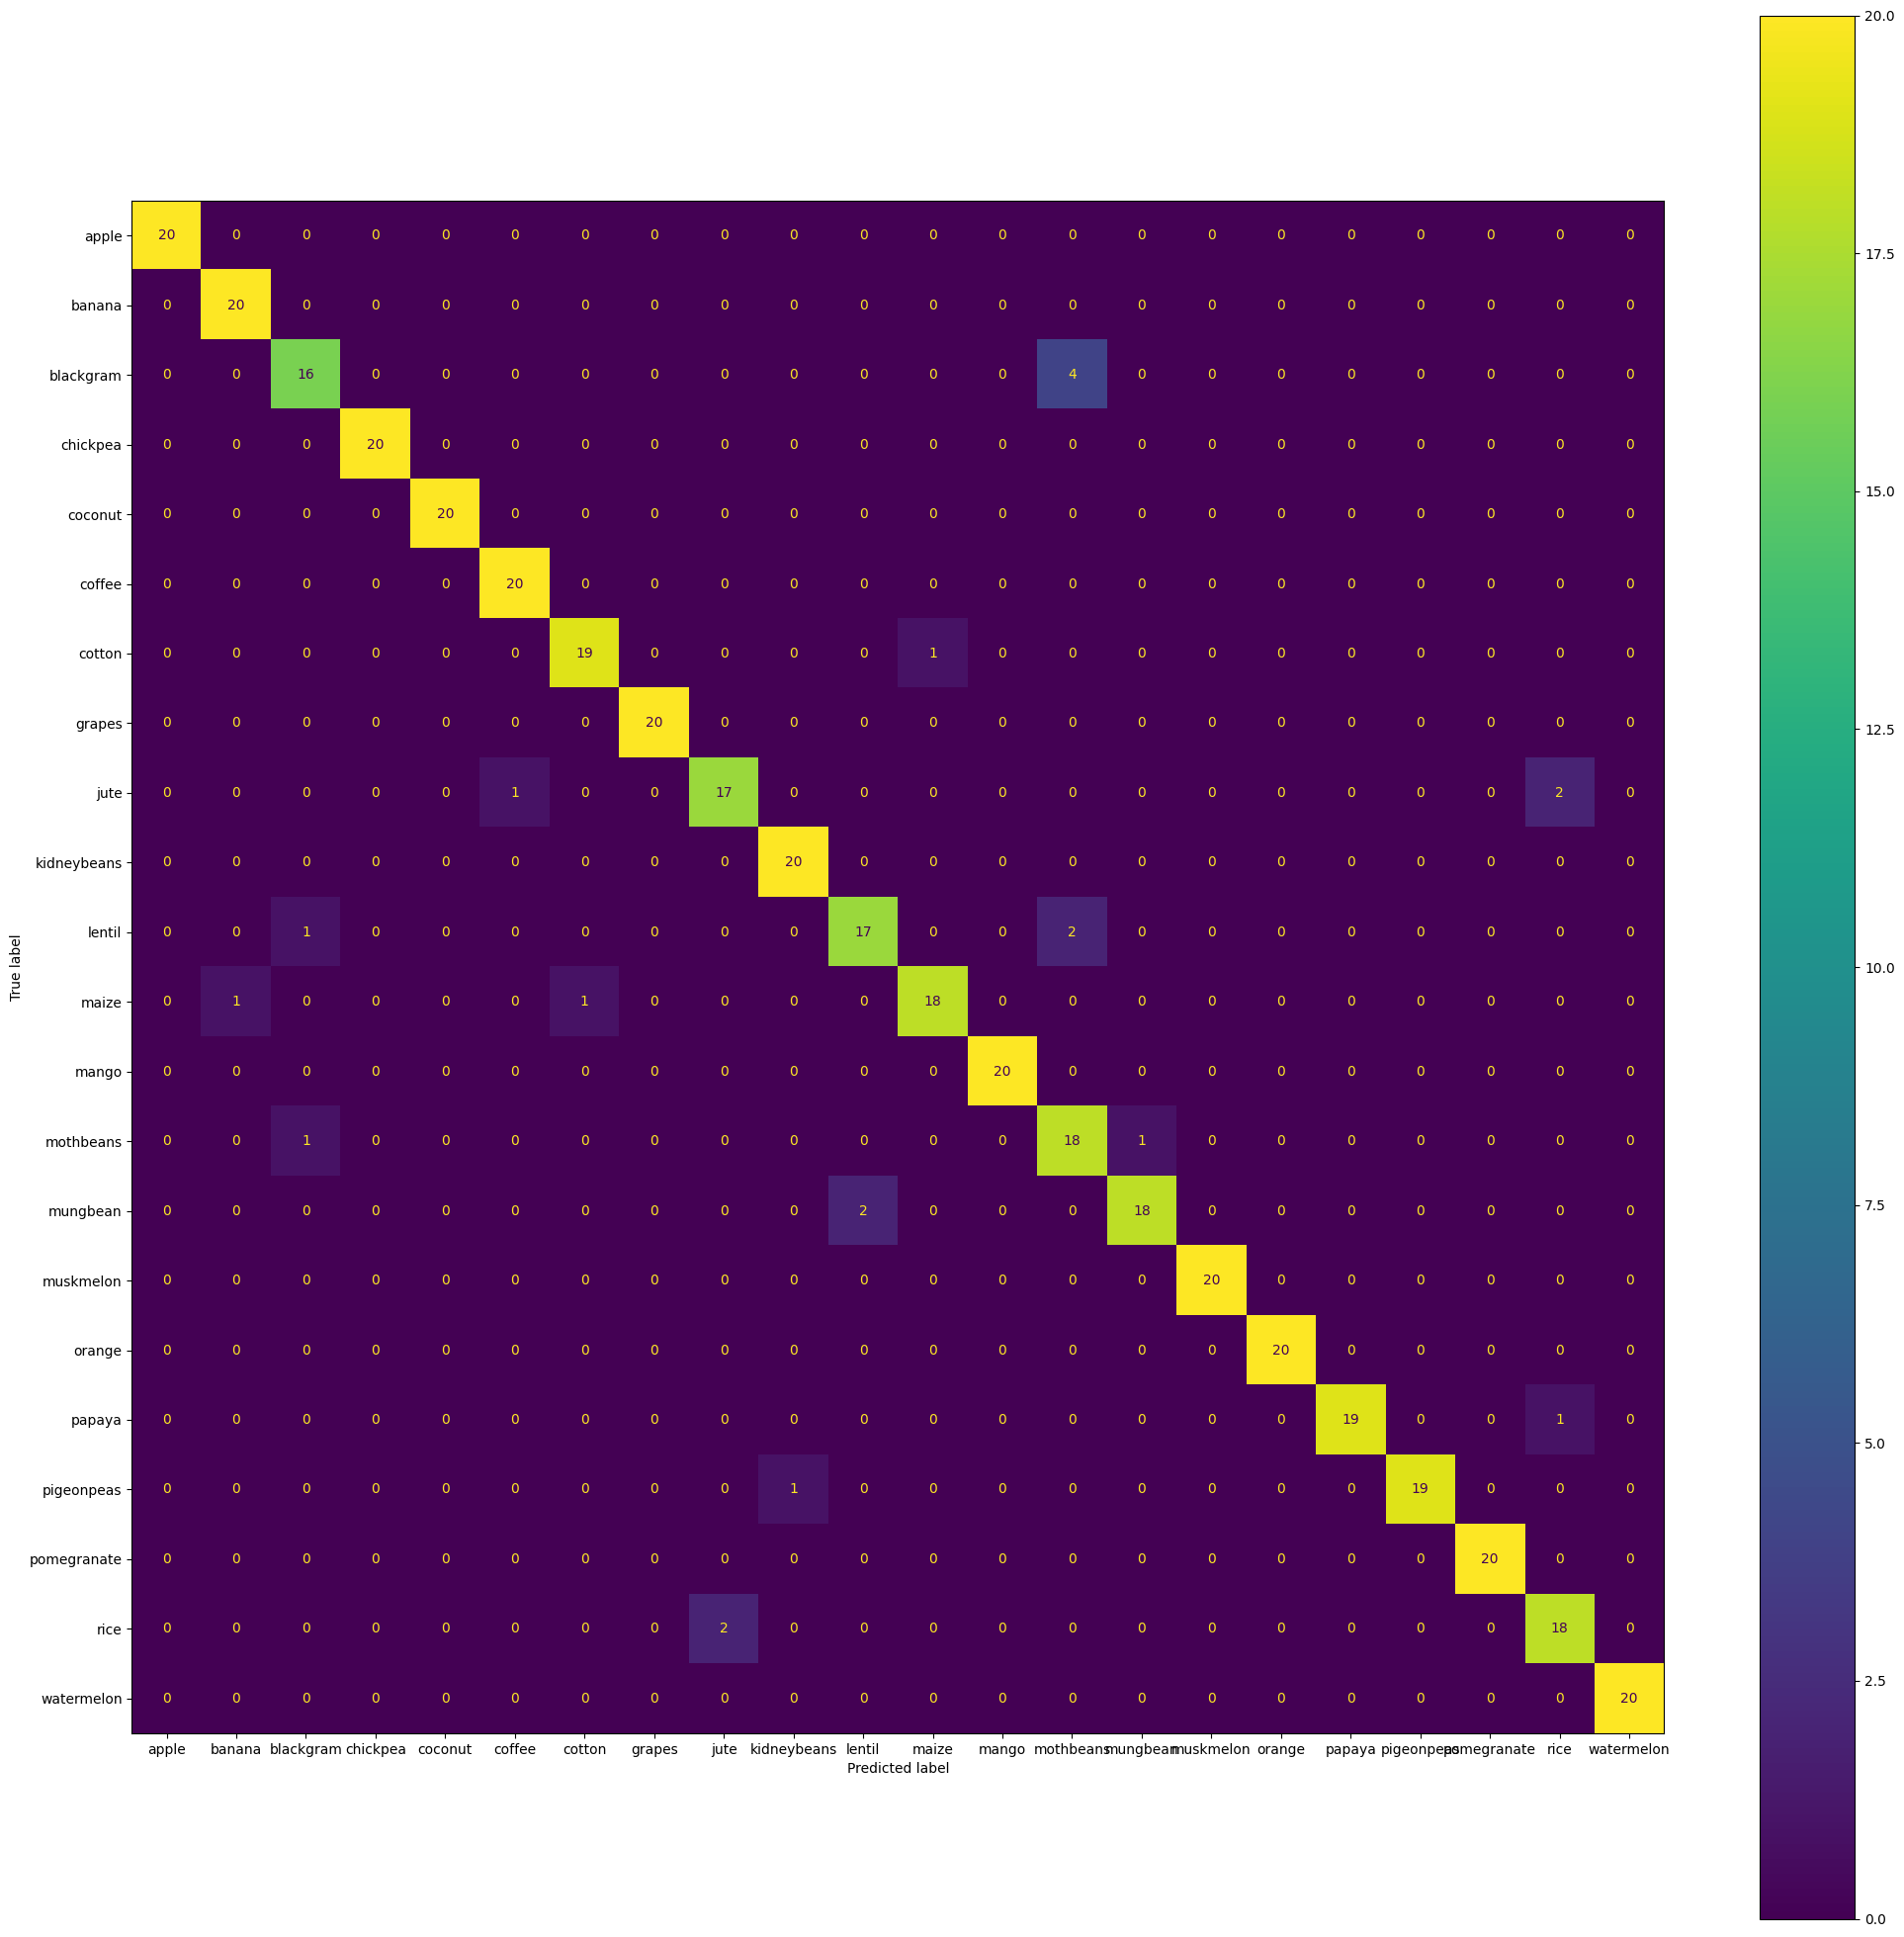

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=LogReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LogReg.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

In [ ]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00

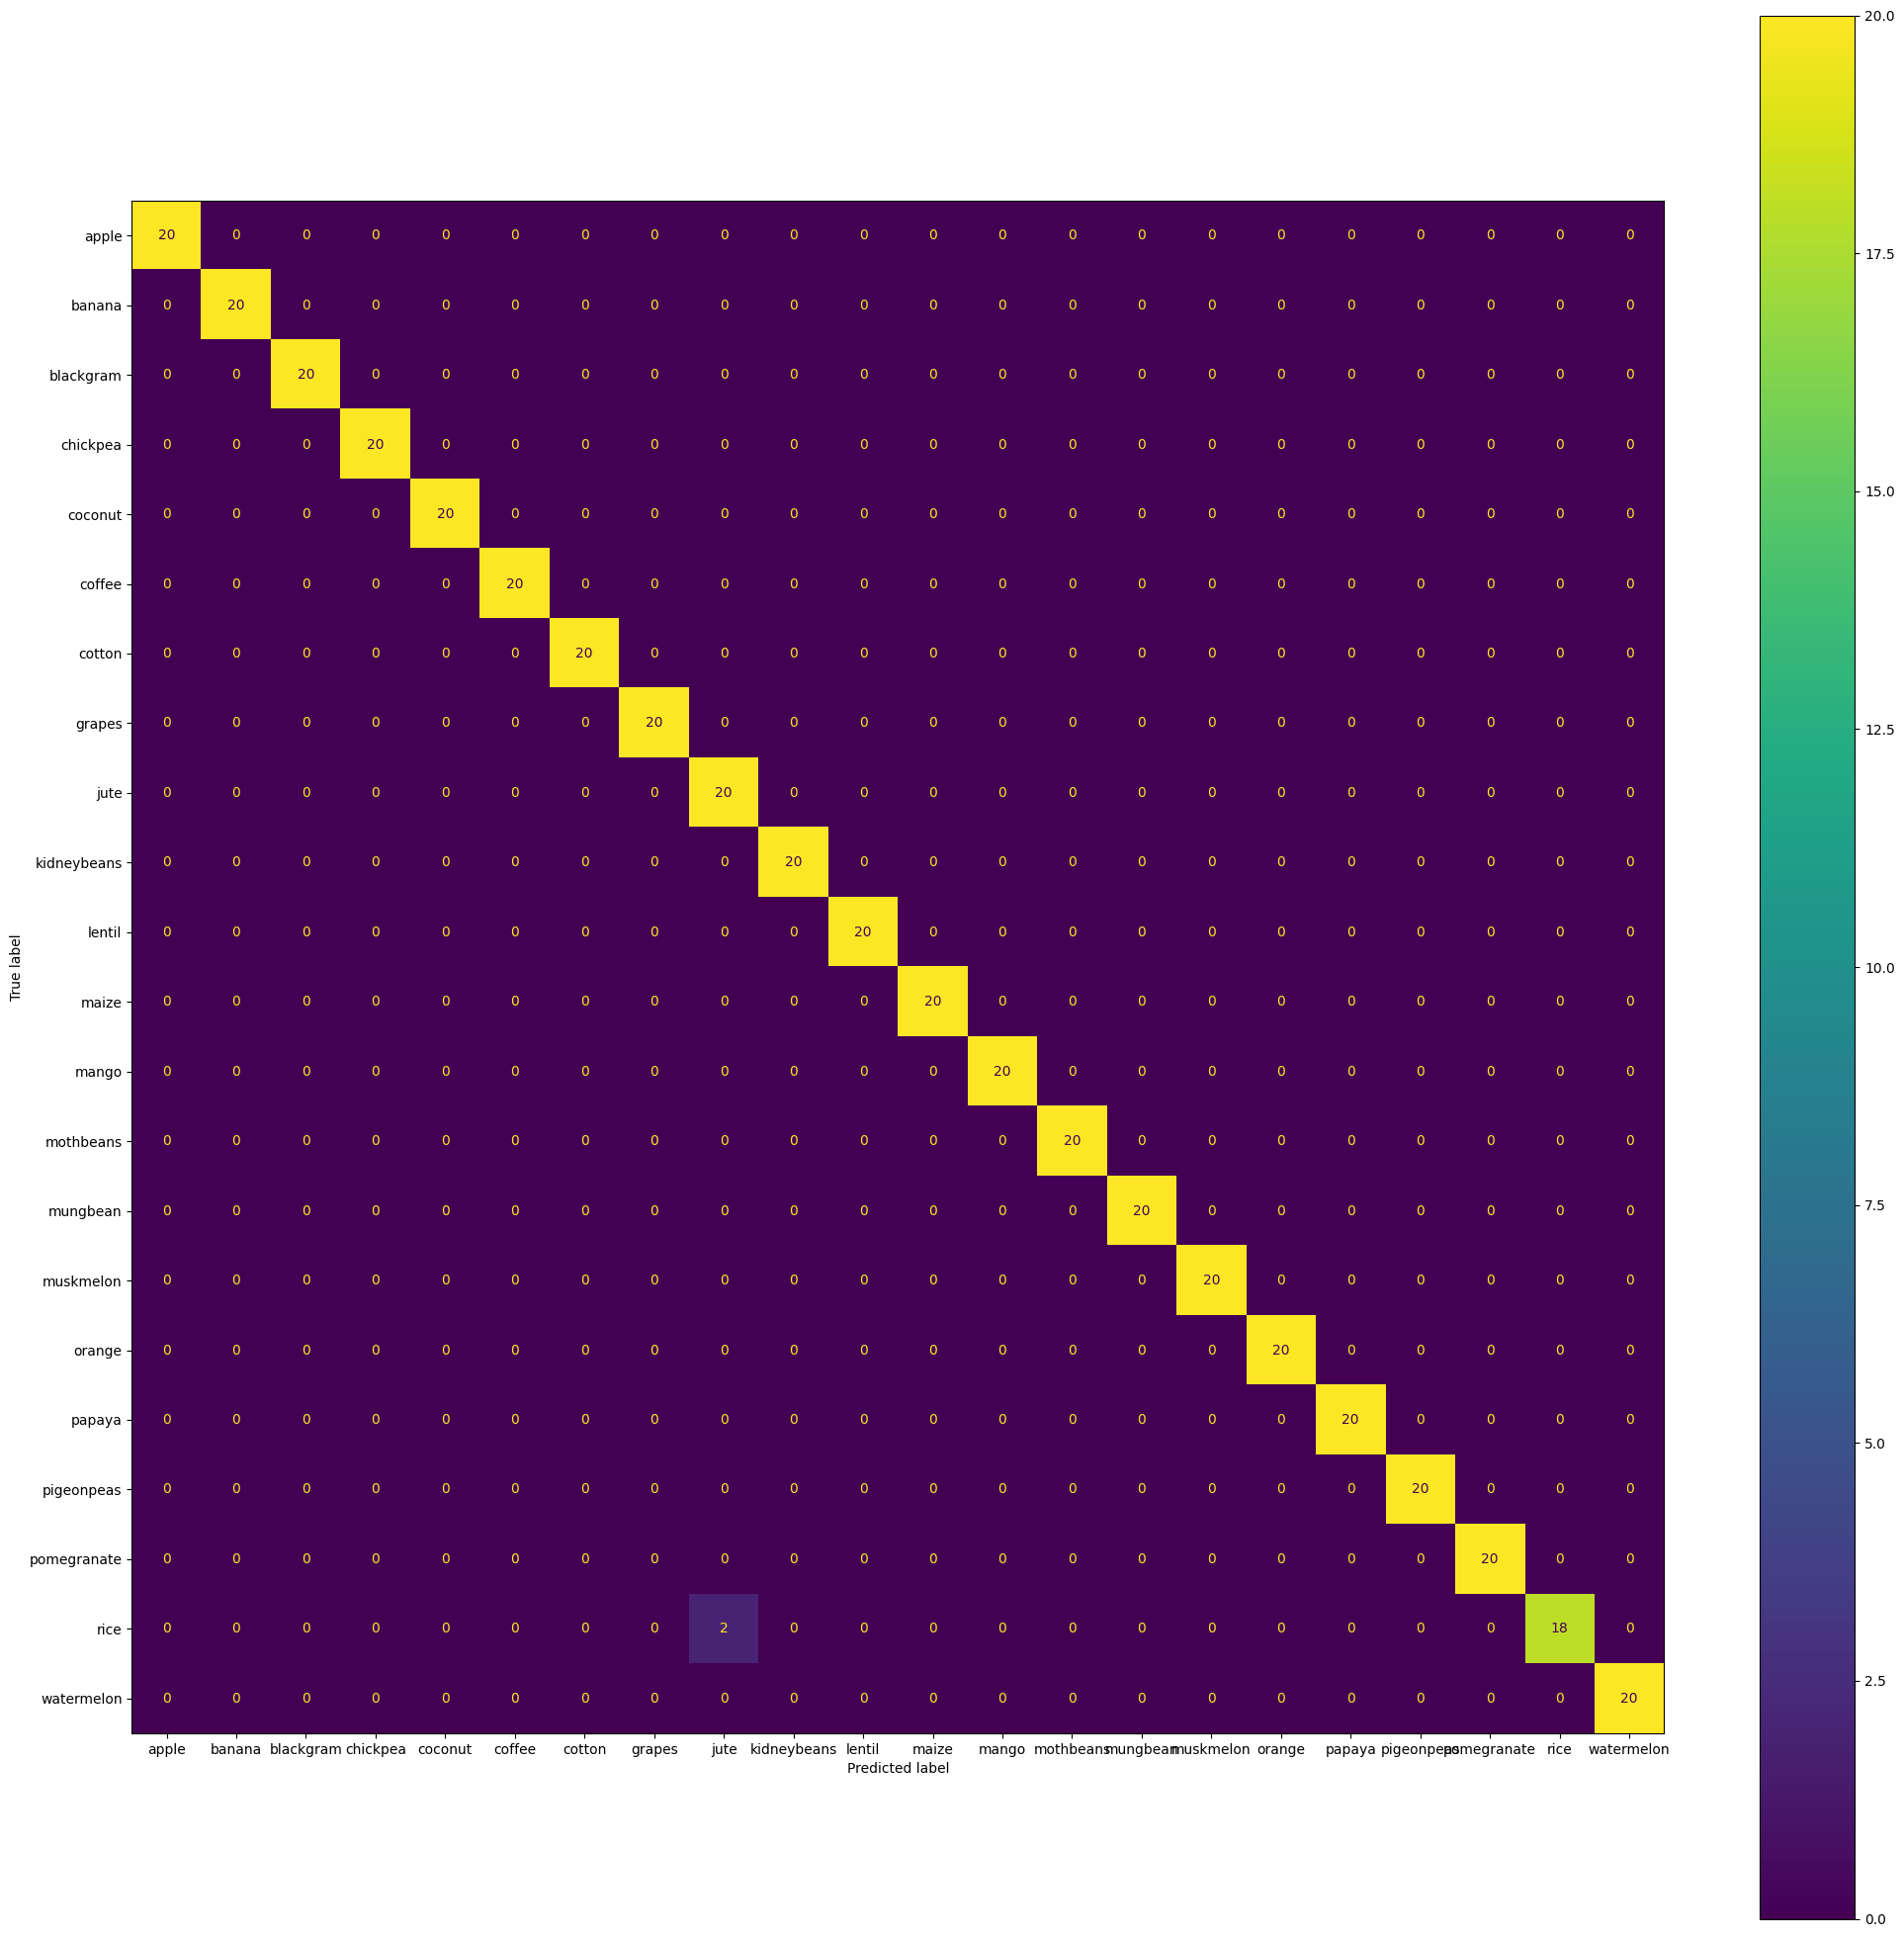

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)
predicted_values = le.inverse_transform(predicted_values)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      0.95      0.97        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00     

In [ ]:
score = cross_val_score(XB,Xtrain,Ytrain,cv=5)
score

array([0.99715909, 0.98863636, 0.98863636, 0.98863636, 0.99147727])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

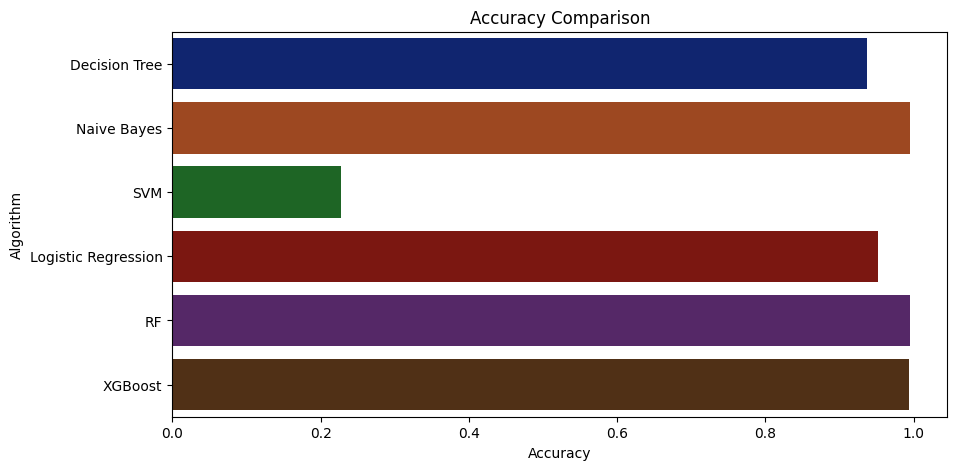

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9363636363636364
Naive Bayes --> 0.9954545454545455
SVM --> 0.22727272727272727
Logistic Regression --> 0.9522727272727273
RF --> 0.9954545454545455
XGBoost --> 0.9931818181818182


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_depth=1, random_state=0).fit(Xtrain, Ytrain)
predicted_values = grad.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('grad')
print("grad's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

grad's Accuracy is:  0.04090909090909091
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00        18
      banana       0.00      0.00      0.00        18
   blackgram       0.00      0.00      0.00        22
    chickpea       0.00      0.00      0.00        23
     coconut       0.00      0.00      0.00        15
      coffee       0.00      0.00      0.00        17
      cotton       0.00      0.00      0.00        16
      grapes       0.00      0.00      0.00        18
        jute       0.00      0.00      0.00        21
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.00      0.00      0.00        17
       maize       0.11      1.00      0.20        18
       mango       0.00      0.00      0.00        21
   mothbeans       0.00      0.00      0.00        25
    mungbean       0.00      0.00      0.00        17
   muskmelon       0.00      0.00      0.00        23
      orange       0.00      0.00      0

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
mod = LGBMClassifier()
mod.fit(Xtrain, Ytrain)
predicted_values = mod.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('lgb')
print("lgb's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

lgb's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        21
 kidneybeans       1.00      0.95      0.97        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [ ]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier()

sg.fit(Xtrain, Ytrain)
predicted_values = sg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('sgd')
print("sgd's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

sgd's Accuracy is:  0.6681818181818182
              precision    recall  f1-score   support

       apple       0.95      1.00      0.97        18
      banana       1.00      0.28      0.43        18
   blackgram       0.61      0.91      0.73        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.92      0.73      0.81        15
      coffee       1.00      0.94      0.97        17
      cotton       1.00      0.75      0.86        16
      grapes       1.00      0.94      0.97        18
        jute       0.14      1.00      0.25        21
 kidneybeans       1.00      0.75      0.86        20
      lentil       1.00      0.76      0.87        17
       maize       0.00      0.00      0.00        18
       mango       0.95      1.00      0.98        21
   mothbeans       0.93      0.56      0.70        25
    mungbean       0.93      0.82      0.87        17
   muskmelon       0.92      1.00      0.96        23
      orange       1.00      1.00      1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)
predicted_values = knn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('knn')
print("knn's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

knn's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.90      0.84        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

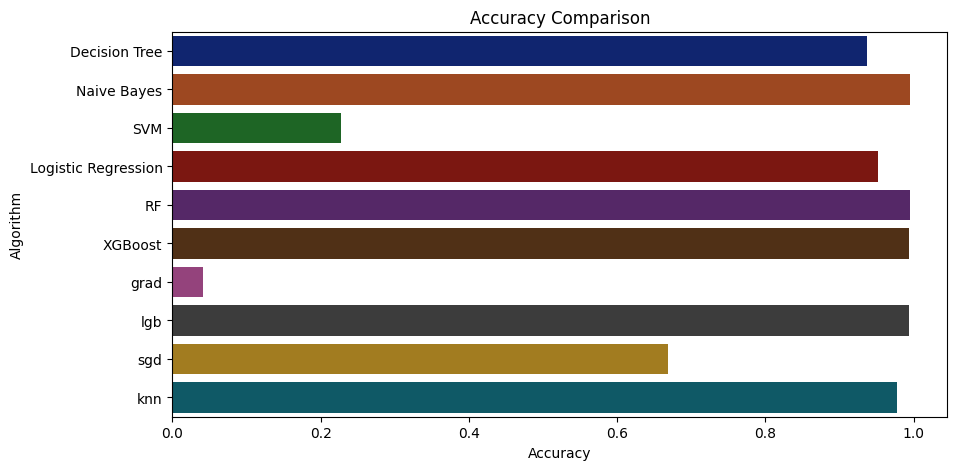

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9363636363636364
Naive Bayes --> 0.9954545454545455
SVM --> 0.22727272727272727
Logistic Regression --> 0.9522727272727273
RF --> 0.9954545454545455
XGBoost --> 0.9931818181818182
grad --> 0.04090909090909091
lgb --> 0.9931818181818182
sgd --> 0.6681818181818182
knn --> 0.9772727272727273


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =0, stratify = target)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)

model_1 = LogisticRegression()

model_1.fit(Xtrain, Ytrain)

ypred = model_1.predict(Xtest)

model_2 = GaussianNB()

model_2.fit(Xtrain, Ytrain)

ypred = model_2.predict(Xtest)


model_3 = RandomForestClassifier()

model_3.fit(Xtrain, Ytrain)

ypred = model_3.predict(Xtest)

model_4= XGBClassifier()
model_4.fit(Xtrain,Ytrain)
ypred= model_4.predict(Xtest)
eclf = VotingClassifier(

 estimators=[('lr', model_1), ('rf', model_2), ('gnb', model_3),('xg',model_4)],

 voting='hard'

)
eclf.fit(Xtrain,Ytrain)
predicted_values = eclf.predict(Xtest)
predicted_values = le.inverse_transform(predicted_values)
x = metrics.accuracy_score(Ytest, predicted_values)
print(x)

for clf, label in zip([model_1, model_2, model_3,model_4, eclf], ['Logistic Regression', 'Naive Bayes', 'Random Forest','xgboost', 'Ensemble']):

 scores = cross_val_score(clf, Xtrain, Ytrain, scoring='accuracy', cv=5)

 print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))

0.9954545454545455
Accuracy: 0.961932 (+/- 0.005269) [Logistic Regression]
Accuracy: 0.993750 (+/- 0.003313) [Naive Bayes]
Accuracy: 0.993182 (+/- 0.003854) [Random Forest]
Accuracy: 0.990909 (+/- 0.003313) [xgboost]
Accuracy: 0.992045 (+/- 0.004175) [Ensemble]


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =0, stratify = target)

In [ ]:
from lightgbm.compat import check_classification_targets
from xgboost.compat import XGBoostLabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

model_1 = LogisticRegression()

model_1.fit(Xtrain, Ytrain)

ypred1 = model_1.predict(Xtest)

model_2 = GaussianNB()

model_2.fit(Xtrain, Ytrain)

ypred2 = model_2.predict(Xtest)


model_3 = RandomForestClassifier()

model_3.fit(Xtrain, Ytrain)

ypred3 = model_3.predict(Xtest)

eclf = VotingClassifier(

 estimators=[('lr', model_1), ('rf', model_2), ('gnb', model_3)],

 voting='hard'

)
eclf.fit(Xtrain,Ytrain)
predicted_values = eclf.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print(x)
acc.append(x)
model.append('ensemble')
#print("knn's Accuracy is: ", x)
eclf.score(Xtest,Ytest)


for clf, label in zip([model_1, model_2, model_3 , eclf], ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Ensemble']):

 scores = cross_val_score(clf, features, target, scoring='accuracy', cv=5)

 print("Accuracy: %f (+/- %f) [%s]" % (scores.mean(), scores.std(), label))

print(classification_report(Ytest,predicted_values))

0.9954545454545455
Accuracy: 0.954545 (+/- 0.009535) [Logistic Regression]
Accuracy: 0.995000 (+/- 0.002227) [Naive Bayes]
Accuracy: 0.993636 (+/- 0.003910) [Random Forest]
Accuracy: 0.993636 (+/- 0.003015) [Ensemble]
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00  

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = eclf.predict(data)
print(prediction)

['coffee']


In [ ]:
from joblib import Parallel, delayed
import joblib
import pickle

pickle.dump(eclf, open('model.pkl', 'wb'))
# # joblib.dump(eclf, 'modelweight.pkl')

# knn_from_joblib = joblib.load('modelweight.pkl')

# # Use the loaded model to make predictions
# knn_from_joblib.predict(data)


In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.models import save_model

# # Convert the voting classifier to a Keras model
# model = KerasClassifier(build_fn=eclf)

# # Save the model to an h5 file
# save_model(model, "voting_classifier.h5")

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest,predicted_values)
print(cm)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

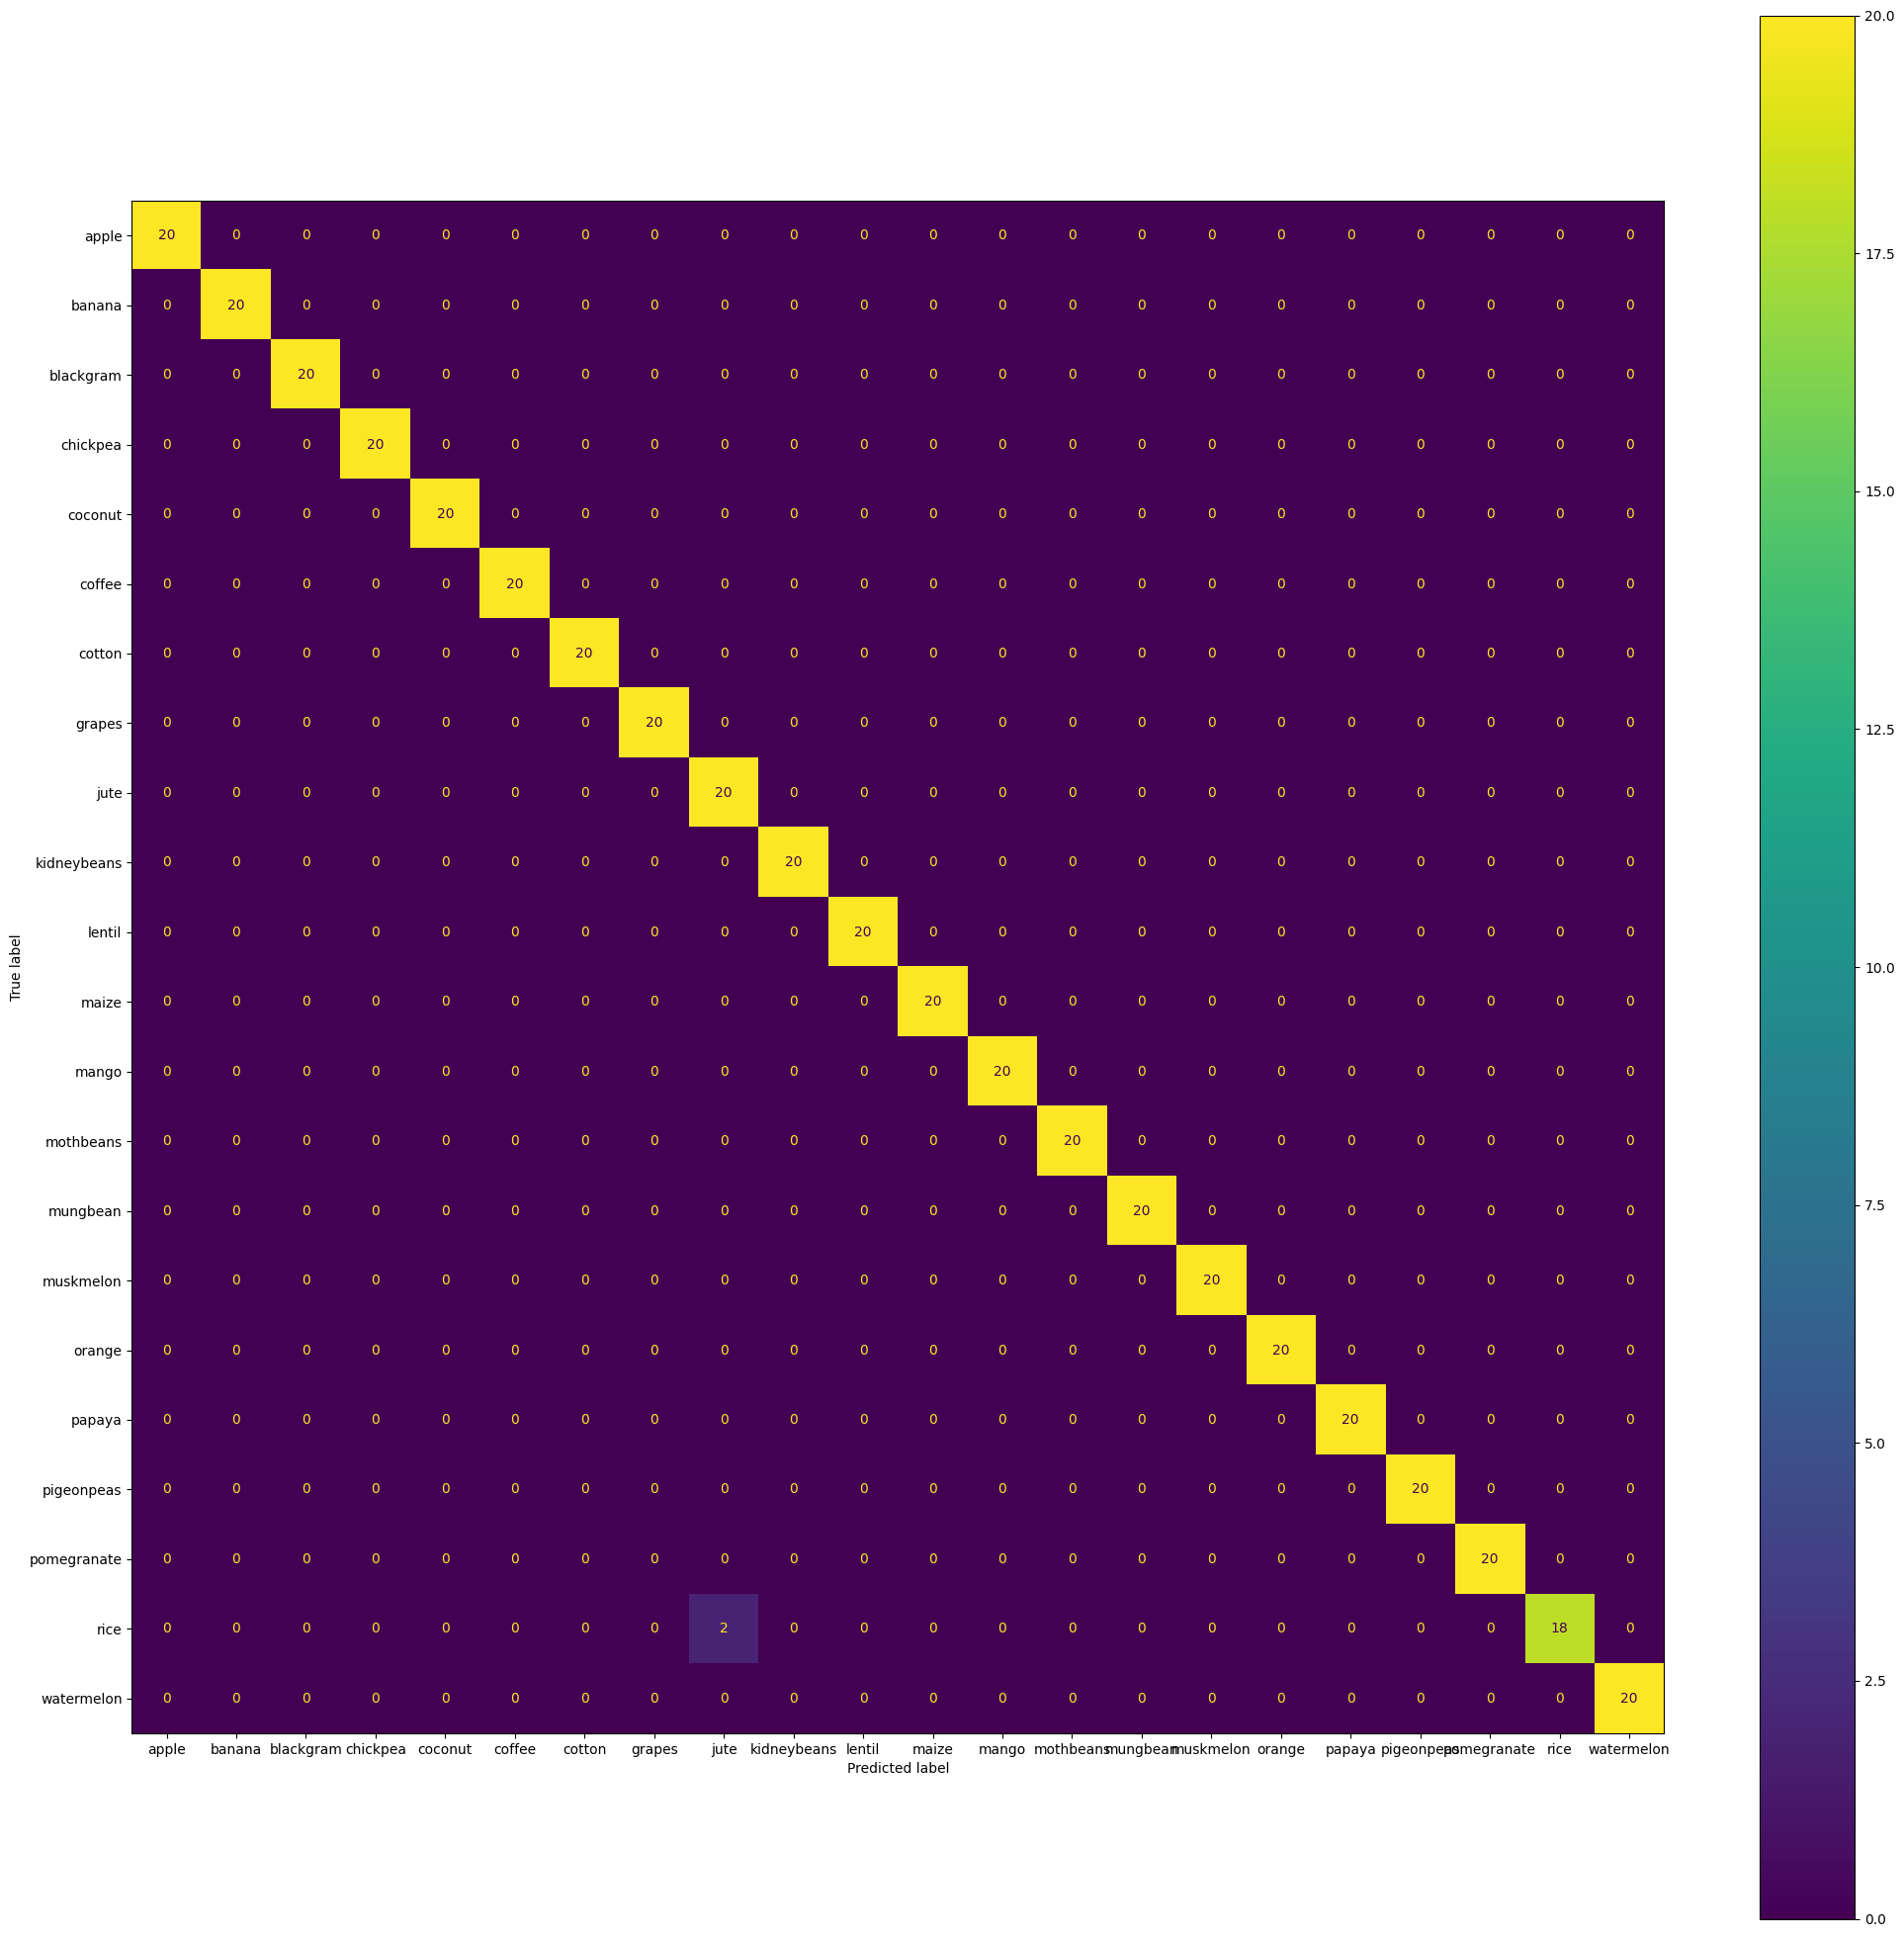

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
eclf.fit(Xtrain,Ytrain)
predicted_values = eclf.predict(Xtest)
cm = confusion_matrix(Ytest, predicted_values, labels=eclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf.classes_)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax)
plt.show()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

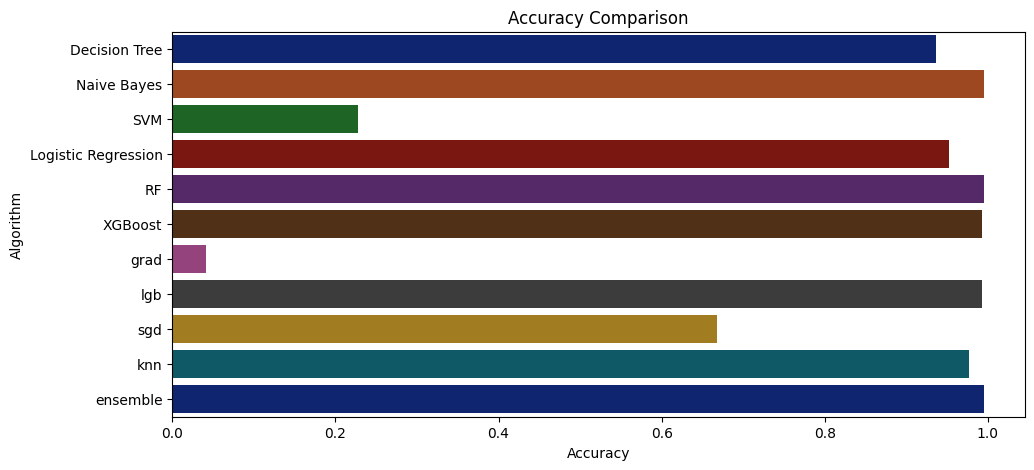

In [ ]:
plt.figure(figsize=[11,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9363636363636364
Naive Bayes --> 0.9954545454545455
SVM --> 0.22727272727272727
Logistic Regression --> 0.9522727272727273
RF --> 0.9954545454545455
XGBoost --> 0.9931818181818182
grad --> 0.04090909090909091
lgb --> 0.9931818181818182
sgd --> 0.6681818181818182
knn --> 0.9772727272727273
ensemble --> 0.9954545454545455


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
eclf.fit(Xtrain,Ytrain)
predicted_values = eclf.predict(Xtest)
a=accuracy_score(Ytest,predicted_values)
p=precision_score(Ytest,predicted_values , labels=eclf.classes_, average='micro')
r=recall_score(Ytest,predicted_values , labels=eclf.classes_, average='micro')
f=f1_score(Ytest,predicted_values , labels=eclf.classes_, average='micro')
print(a,p,r,f)

0.9954545454545455 0.9954545454545455 0.9954545454545455 0.9954545454545455
